In [3]:
# need to subscribe to the images, but here we'll just take a screenshot of what the robot sees 
#to try and process it 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import re
import os
import tensorflow as tf
import cv2
from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image
import glob
import array
from numpy import argmax
from numpy import array
from array import array 
from PIL import Image
import pandas as pd

/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
DATADIR = "/home/fizzer/enph353_ws/src/bringing-anki-back/competition_2019t2/navigation_raw_img/"

307200
307200
2
[[116 116 116 ... 120 120 120]
 [116 116 116 ... 120 120 120]
 [116 116 116 ... 120 120 120]
 ...
 [ 13  13  13 ...  84  84  84]
 [ 13  13  13 ...  84  84  84]
 [ 13  13  13 ...  84  84  84]]


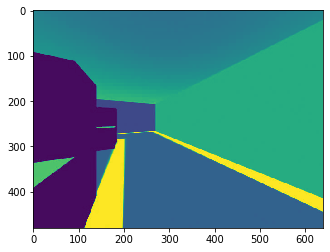

In [13]:
#for the real project, we will have to subscribe to the camera node in ros to get these images. 
#this is the part you will change for that 

xdata = []
xdatabin =[]
i = 0

path = os.path.join(DATADIR)  # create path to dogs and cats
for img in os.listdir(path):  # iterate over each image per dogs and cats
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
    plt.imshow(img_array)
    (thesh, binary_img_array) = cv2.threshold(img_array, 190, 255, cv2.THRESH_BINARY)
    print(img_array.size)
    xdata.append(img_array)
    xdatabin.append(binary_img_array)    

print(len(xdata))

plt.imshow(xdata[0])
print(xdata[0])



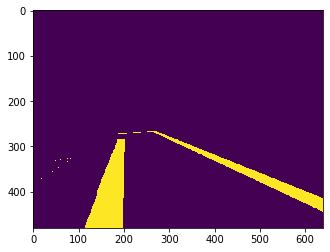

In [14]:
plt.imshow(xdatabin[0])


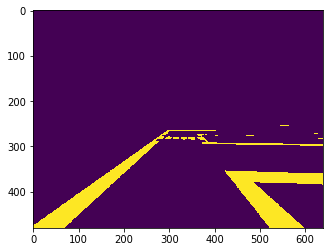

In [15]:
plt.imshow(binary_img_array)

In [16]:
img_array.size

307200

In [17]:
(h,w) = img_array.shape

320.0
(480, 640)


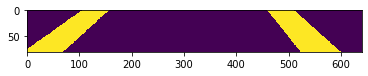

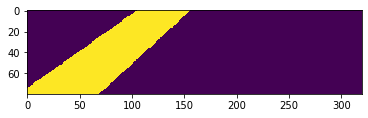

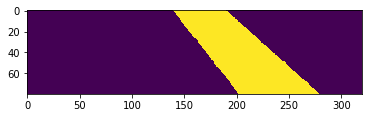

In [18]:
#so we want to do this by getting the position of the two white lines, and then determining the centroid.

image = xdatabin[1]
halfw = w/2
print(halfw)

print(image.shape)
cropImg = (image[400:500, 0:640])
cropL = cropImg[0:100, 0: 320]
cropR = cropImg[0:100, 320 : 640]
plt.imshow(cropImg)
plt.show()
plt.imshow(cropL)
plt.show()
plt.imshow(cropR)
plt.show()


In [19]:
BWImg = cropImg
bw1 = cropL
bw2 = cropR


In [20]:
M1 = cv2.moments(bw1)

if int(M1['m00'] !=0 ):
    cX1 = int(M1["m10"] / M1["m00"])
    cY1 = int(M1["m01"] / M1["m00"])
else:
    cX1 = halfw/2
    cY1 = 160
    
M2 = cv2.moments(bw2)

if int(M2['m00'] !=0 ):
    cX2 = int(M2["m10"] / M2["m00"])
    cY2 = int(M2["m01"] / M2["m00"])
else:
    cX2 = halfw/2
    cY2 = 160
#set defaulft value if theres no m00

print(cX1,cY1, cX2, cY2)

77 42 204 42


In [21]:
cX = int((cX1 + cX2 + 320)/2)
cY = int((cY1 + cY2)/2) +400
print(cX, cY)


300 442


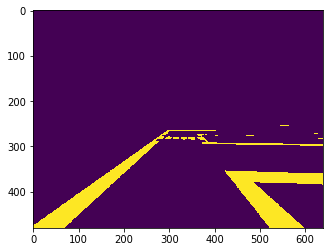

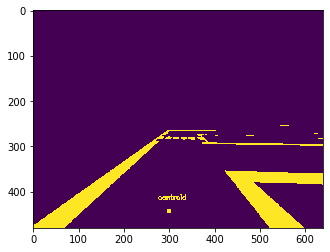

In [22]:
plt.imshow(image)
plt.show()
cv2.circle(image, (cX, cY), 5, (255,255,255), -1)
cv2.putText(image, "centroid", (cX - 25, cY-25), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255, 255, 255), 2)

plt.imshow(image)

In [1]:
plt.imshow(img_array)

NameError: name 'plt' is not defined

In [34]:
#for q learning, we need to find the centroid properly from here, and that will define our state
#we can use two centroid calcs, one for each line - the real centroid will be the mean of those two values. 
#we want to split our image by half, calc the centroid for each half - remember how it is cropped. Find
#average from there, and make that our new centroid

#but what about the places where you dont see any white? - put centroid at edge??

In [87]:
#instead, use mask for where the road is

In [88]:
cv_image = xdata[0]

(h,w,channels) = cv_image.shape
print(cv_image.shape)

#thresholding for one picture
ret,thresh2 = cv2.threshold(cv_image,190,255,cv2.THRESH_BINARY_INV)

cropped_thresh = thresh2[h-100:h, 0:w]
print(cropped_thresh.shape)
cropL = cropped_thresh[0:100, 0: 320]
cropR = cropped_thresh[0:100, 320 : 640]
bw1 = cropL
bw2 = cropR

M1 = cv2.moments(bw1)

if int(M1['m00'] !=0 ):
    cX1 = int(M1["m10"] / M1["m00"])
    cY1 = int(M1["m01"] / M1["m00"])
else:
    cX1 = w/4
    cY1 = 50

M2 = cv2.moments(bw2)

if int(M2['m00'] !=0 ):
    cX2 = int(M2["m10"] / M2["m00"])
    cY2 = int(M2["m01"] / M2["m00"])
else:
    cX2 = w/4
    cY2 = 50
#set defaulft value if theres no m00

print(cX1,cY1, cX2, cY2)

cX = int((cX1 + cX2 + 320)/2)
cY = int((cY1 + cY2)/2) +400




ValueError: not enough values to unpack (expected 3, got 2)